# Analysis of the timing


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

df_to_create = pd.read_csv("../results/timing.csv")
df_to_create.head()

ID              PART   P1T1   P1T2   P1T3   P1T4   P1T5   P2T1   P2T2  \
0   1     1st VR Chaoss  03:01  05:01  04:01  03:40  03:09  02:03  02:43   
1   2     1st SC Chaoss  01:51  07:13  02:56  05:35  04:01  02:01  02:50   
2   3  1st VR Openshift  02:33  03:54  03:26  03:20  03:11  01:12  03:44   
3   4  1st SC Openshift  03:39  06:10  05:50  02:31  02:30  02:06  02:05   
4   5  1st VR Openshift  03:03  05:10  04:01  04:12  03:21  02:48  02:38   

    P2T3   P2T4   P2T5 TOTAL_P1 TOTAL_P2  TOTAL  
0  04:03  02:41  03:07    18:52    14:37  33:29  
1  03:15  04:05  02:41    21:36    14:52  36:28  
2  01:57  02:18  02:23    16:24    11:34  27:58  
3  04:48  04:30  03:25    20:40    16:54  37:34  
4  02:12  02:54  02:43    19:47    13:15  33:02

In [49]:
# Get columns by groups
is_firstvrchaoss =  df_to_create['PART']=="1st VR Chaoss"
first_vr_chaoss = df_to_create[is_firstvrchaoss]

is_firstvrop =  df_to_create['PART']=="1st VR Openshift"
first_vr_openshift = df_to_create[is_firstvrop]

is_firstscchaoss =  df_to_create['PART']=="1st SC Chaoss"
first_sc_chaoss = df_to_create[is_firstscchaoss]

is_firstscopenshift =  df_to_create['PART']=="1st SC Openshift"
first_sc_openshift = df_to_create[is_firstscopenshift]



In [50]:
# Get only the time columns
first_vr_chaoss_times = first_vr_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']]

# Add time columns in seconds format in order to print boxplots
first_vr_chaoss_times['P1T1 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T1']]).total_seconds()
first_vr_chaoss_times['P1T2 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T2']]).total_seconds()
first_vr_chaoss_times['P1T3 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T3']]).total_seconds()
first_vr_chaoss_times['P1T4 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T4']]).total_seconds()
first_vr_chaoss_times['P1T5 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T5']]).total_seconds()
first_vr_chaoss_times['P2T1 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P2T1']]).total_seconds()
first_vr_chaoss_times['P2T2 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P2T2']]).total_seconds()
first_vr_chaoss_times['P2T3 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P2T3']]).total_seconds()
first_vr_chaoss_times['P2T4 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P2T4']]).total_seconds()
first_vr_chaoss_times['P2T5 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P2T5']]).total_seconds()
first_vr_chaoss_times['T1 dif'] = first_vr_chaoss_times.apply (lambda row: row["P1T1 sec"]-row["P2T1 sec"], axis=1)
first_vr_chaoss_times['T2 dif'] = first_vr_chaoss_times.apply (lambda row: row["P1T2 sec"]-row["P2T2 sec"], axis=1)
first_vr_chaoss_times['T3 dif'] = first_vr_chaoss_times.apply (lambda row: row["P1T3 sec"]-row["P2T3 sec"], axis=1)
first_vr_chaoss_times['T4 dif'] = first_vr_chaoss_times.apply (lambda row: row["P1T4 sec"]-row["P2T4 sec"], axis=1)
first_vr_chaoss_times['T5 dif'] = first_vr_chaoss_times.apply (lambda row: row["P1T5 sec"]-row["P2T5 sec"], axis=1)

# Get only the time columns
first_vr_openshift_times = first_vr_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']]

# Add time columns in seconds format in order to print boxplots
first_vr_openshift_times['P1T1 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P1T1']]).total_seconds()
first_vr_openshift_times['P1T2 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P1T2']]).total_seconds()
first_vr_openshift_times['P1T3 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P1T3']]).total_seconds()
first_vr_openshift_times['P1T4 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P1T4']]).total_seconds()
first_vr_openshift_times['P1T5 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P1T5']]).total_seconds()
first_vr_openshift_times['P2T1 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P2T1']]).total_seconds()
first_vr_openshift_times['P2T2 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P2T2']]).total_seconds()
first_vr_openshift_times['P2T3 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P2T3']]).total_seconds()
first_vr_openshift_times['P2T4 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P2T4']]).total_seconds()
first_vr_openshift_times['P2T5 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_openshift_times['P2T5']]).total_seconds()
first_vr_openshift_times['T1 dif'] = first_vr_openshift_times.apply (lambda row: row["P1T1 sec"]-row["P2T1 sec"], axis=1)
first_vr_openshift_times['T2 dif'] = first_vr_openshift_times.apply (lambda row: row["P1T2 sec"]-row["P2T2 sec"], axis=1)
first_vr_openshift_times['T3 dif'] = first_vr_openshift_times.apply (lambda row: row["P1T3 sec"]-row["P2T3 sec"], axis=1)
first_vr_openshift_times['T4 dif'] = first_vr_openshift_times.apply (lambda row: row["P1T4 sec"]-row["P2T4 sec"], axis=1)
first_vr_openshift_times['T5 dif'] = first_vr_openshift_times.apply (lambda row: row["P1T5 sec"]-row["P2T5 sec"], axis=1)

# Get only the time columns
first_sc_chaoss_times = first_sc_chaoss[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']]

# Add time columns in seconds format in order to print boxplots
first_sc_chaoss_times['P1T1 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P1T1']]).total_seconds()
first_sc_chaoss_times['P1T2 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P1T2']]).total_seconds()
first_sc_chaoss_times['P1T3 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P1T3']]).total_seconds()
first_sc_chaoss_times['P1T4 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P1T4']]).total_seconds()
first_sc_chaoss_times['P1T5 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P1T5']]).total_seconds()
first_sc_chaoss_times['P2T1 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P2T1']]).total_seconds()
first_sc_chaoss_times['P2T2 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P2T2']]).total_seconds()
first_sc_chaoss_times['P2T3 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P2T3']]).total_seconds()
first_sc_chaoss_times['P2T4 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P2T4']]).total_seconds()
first_sc_chaoss_times['P2T5 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_chaoss_times['P2T5']]).total_seconds()
first_sc_chaoss_times['T1 dif'] = first_sc_chaoss_times.apply (lambda row: row["P1T1 sec"]-row["P2T1 sec"], axis=1)
first_sc_chaoss_times['T2 dif'] = first_sc_chaoss_times.apply (lambda row: row["P1T2 sec"]-row["P2T2 sec"], axis=1)
first_sc_chaoss_times['T3 dif'] = first_sc_chaoss_times.apply (lambda row: row["P1T3 sec"]-row["P2T3 sec"], axis=1)
first_sc_chaoss_times['T4 dif'] = first_sc_chaoss_times.apply (lambda row: row["P1T4 sec"]-row["P2T4 sec"], axis=1)
first_sc_chaoss_times['T5 dif'] = first_sc_chaoss_times.apply (lambda row: row["P1T5 sec"]-row["P2T5 sec"], axis=1)

# Get only the time columns
first_sc_openshift_times = first_sc_openshift[['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']]

# Add time columns in seconds format in order to print boxplots
first_sc_openshift_times['P1T1 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P1T1']]).total_seconds()
first_sc_openshift_times['P1T2 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P1T2']]).total_seconds()
first_sc_openshift_times['P1T3 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P1T3']]).total_seconds()
first_sc_openshift_times['P1T4 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P1T4']]).total_seconds()
first_sc_openshift_times['P1T5 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P1T5']]).total_seconds()
first_sc_openshift_times['P2T1 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P2T1']]).total_seconds()
first_sc_openshift_times['P2T2 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P2T2']]).total_seconds()
first_sc_openshift_times['P2T3 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P2T3']]).total_seconds()
first_sc_openshift_times['P2T4 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P2T4']]).total_seconds()
first_sc_openshift_times['P2T5 sec'] = pd.to_timedelta(['00:'+i for i in first_sc_openshift_times['P2T5']]).total_seconds()
first_sc_openshift_times['T1 dif'] = first_sc_openshift_times.apply (lambda row: row["P1T1 sec"]-row["P2T1 sec"], axis=1)
first_sc_openshift_times['T2 dif'] = first_sc_openshift_times.apply (lambda row: row["P1T2 sec"]-row["P2T2 sec"], axis=1)
first_sc_openshift_times['T3 dif'] = first_sc_openshift_times.apply (lambda row: row["P1T3 sec"]-row["P2T3 sec"], axis=1)
first_sc_openshift_times['T4 dif'] = first_sc_openshift_times.apply (lambda row: row["P1T4 sec"]-row["P2T4 sec"], axis=1)
first_sc_openshift_times['T5 dif'] = first_sc_openshift_times.apply (lambda row: row["P1T5 sec"]-row["P2T5 sec"], axis=1)


/tmp/ipykernel_172354/2738212848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_vr_chaoss_times['P1T1 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T1']]).total_seconds()
/tmp/ipykernel_172354/2738212848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_vr_chaoss_times['P1T2 sec'] = pd.to_timedelta(['00:'+i for i in first_vr_chaoss_times['P1T2']]).total_seconds()
/tmp/ipykernel_172354/2738212848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

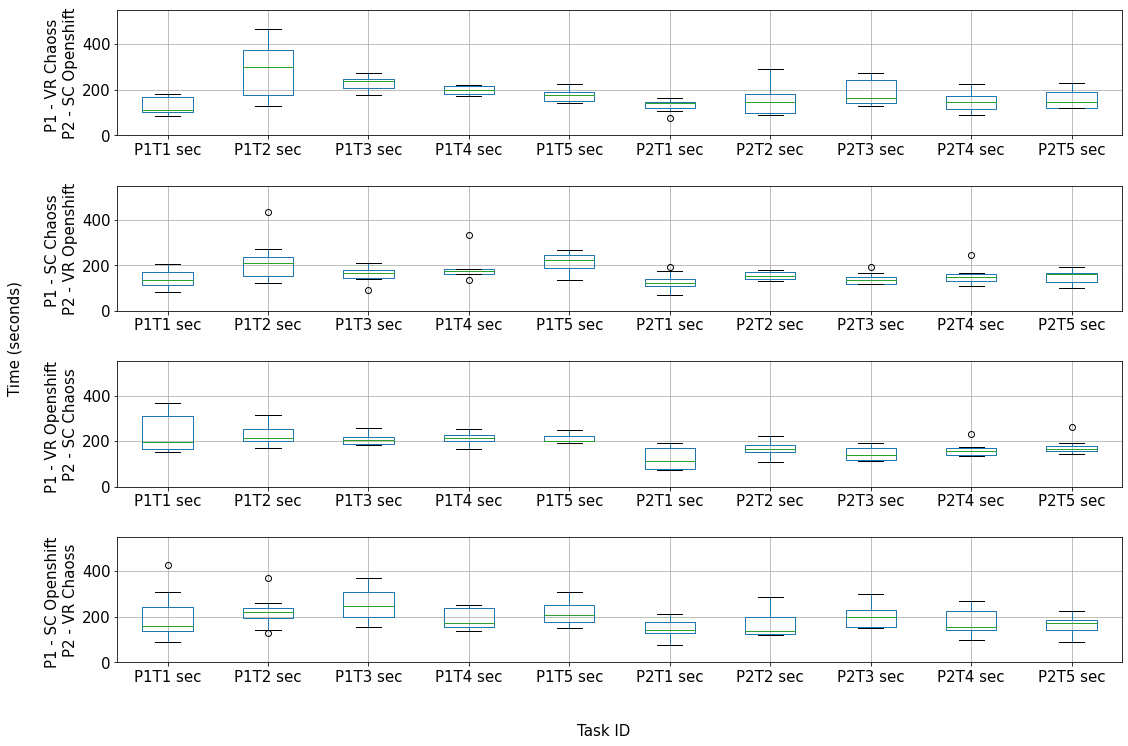

In [68]:
# Boxplot for times
fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)
plt.subplot(4, 1, 1)
plt.ylim(0,550)
first_vr_chaoss_boxplot = first_vr_chaoss_times.boxplot(column=['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'], rot=0)
plt.ylabel("P1 - VR Chaoss \nP2 - SC Openshift")

plt.subplot(4, 1, 2)
plt.ylim(0,550)
first_sc_chaoss_boxplot = first_sc_chaoss_times.boxplot(column=['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'], rot=0)
plt.ylabel("P1 - SC Chaoss \nP2 - VR Openshift")

plt.subplot(4, 1, 3)
plt.ylim(0,550)
first_vr_openshift_boxplot = first_vr_openshift_times.boxplot(column=['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'], rot=0)
plt.ylabel("P1 - VR Openshift \nP2 - SC Chaoss")

plt.subplot(4, 1, 4)
plt.ylim(0,550)
first_sc_openshift_boxplot = first_sc_openshift_times.boxplot(column=['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'], rot=0)
plt.ylabel("P1 - SC Openshift \nP2 - VR Chaoss")

fig.text(0.5, 0.04, 'Task ID', ha='center')
fig.text(0.04, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_times_boxplots.png', bbox_inches='tight')

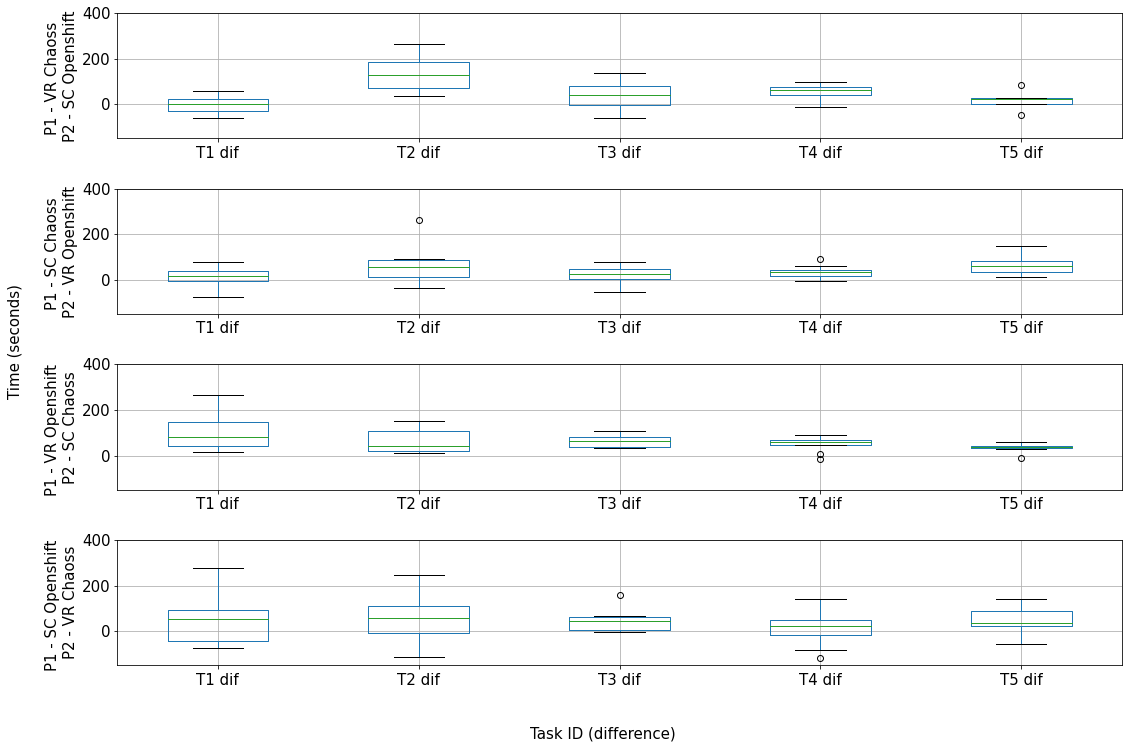

In [67]:
# Boxplot for dif times
fig = plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)
plt.subplot(4, 1, 1)
plt.ylim(-150,400)
first_vr_chaoss_boxplot = first_vr_chaoss_times.boxplot(column=['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif'], rot=0)
plt.ylabel("P1 - VR Chaoss \nP2 - SC Openshift")

plt.subplot(4, 1, 2)
plt.ylim(-150,400)
first_sc_chaoss_boxplot = first_sc_chaoss_times.boxplot(column=['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif'], rot=0)
plt.ylabel("P1 - SC Chaoss \nP2 - VR Openshift")

plt.subplot(4, 1, 3)
plt.ylim(-150,400)
first_vr_openshift_boxplot = first_vr_openshift_times.boxplot(column=['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif'], rot=0)
plt.ylabel("P1 - VR Openshift \nP2 - SC Chaoss")

plt.subplot(4, 1, 4)
plt.ylim(-150,400)
first_sc_openshift_boxplot = first_sc_openshift_times.boxplot(column=['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif'], rot=0)
plt.ylabel("P1 - SC Openshift \nP2 - VR Chaoss")

fig.text(0.5, 0.04, 'Task ID (difference)', ha='center')
fig.text(0.04, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_boxplots_dif_times.png', bbox_inches='tight')

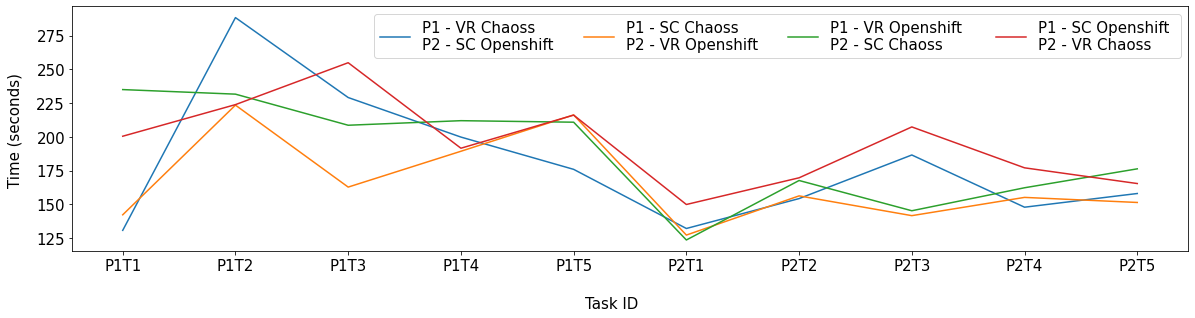

In [66]:
# Average evolution
first_vr_chaoss_means = first_vr_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean()
first_sc_chaoss_means = first_sc_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean()
first_vr_openshift_means = first_vr_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean()
first_sc_openshift_means = first_sc_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
first_vr_chaoss_means.plot.line(label='P1 - VR Chaoss \nP2 - SC Openshift')
first_sc_chaoss_means.plot.line(label='P1 - SC Chaoss \nP2 - VR Openshift')
first_vr_openshift_means.plot.line(label='P1 - VR Openshift \nP2 - SC Chaoss')
first_sc_openshift_means.plot.line(label='P1 - SC Openshift \nP2 - VR Chaoss')
axes.set_xticks(np.arange(10));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5'])

fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_times_avg_evolution.png', bbox_inches='tight')

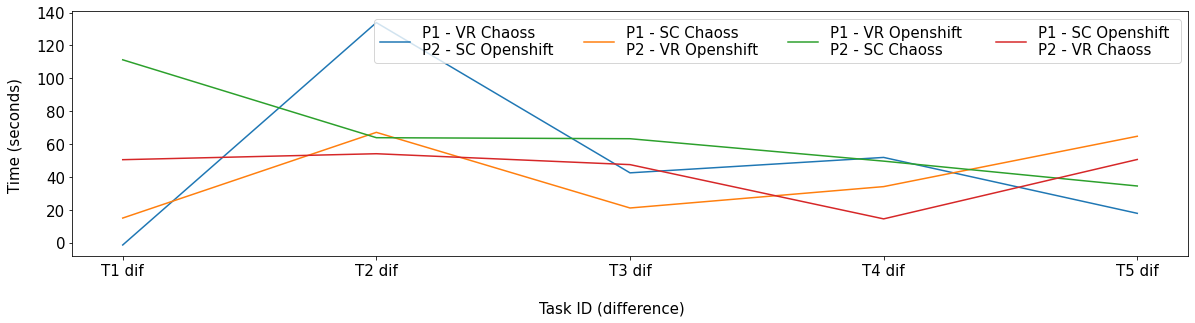

In [69]:
# Average diff P1 P2 evolution
first_vr_chaoss_means_diff = first_vr_chaoss_times[['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif']].mean()
first_sc_chaoss_means_diff = first_sc_chaoss_times[['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif']].mean()
first_vr_openshift_means_diff = first_vr_openshift_times[['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif']].mean()
first_sc_openshift_means_diff = first_sc_openshift_times[['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif']].mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
first_vr_chaoss_means_diff.plot.line(label='P1 - VR Chaoss \nP2 - SC Openshift')
first_sc_chaoss_means_diff.plot.line(label='P1 - SC Chaoss \nP2 - VR Openshift')
first_vr_openshift_means_diff.plot.line(label='P1 - VR Openshift \nP2 - SC Chaoss')
first_sc_openshift_means_diff.plot.line(label='P1 - SC Openshift \nP2 - VR Chaoss')
axes.set_xticks(np.arange(5));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['T1 dif', 'T2 dif', 'T3 dif', 'T4 dif', 'T5 dif'])

fig.text(0.5, -0.05, 'Task ID (difference)', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_times_avg_dif_evolution.png', bbox_inches='tight')

In [85]:
# Mann Whitney Tests
### Starting Chaoss then OpenShift

from scipy.stats import mannwhitneyu

mannwhitney_chaoss_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T3 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T3 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# All
first_vr_chaoss_times_concat = pd.concat([first_vr_chaoss_times['P1T1 sec'], first_vr_chaoss_times['P1T2 sec'], first_vr_chaoss_times['P1T3 sec'], first_vr_chaoss_times['P1T4 sec'], first_vr_chaoss_times['P1T5 sec'], first_vr_chaoss_times['P2T1 sec'], first_vr_chaoss_times['P2T2 sec'], first_vr_chaoss_times['P2T3 sec'], first_vr_chaoss_times['P2T4 sec'], first_vr_chaoss_times['P2T5 sec']])
first_sc_chaoss_times_concat = pd.concat([first_sc_chaoss_times['P1T1 sec'], first_sc_chaoss_times['P1T2 sec'], first_sc_chaoss_times['P1T3 sec'], first_sc_chaoss_times['P1T4 sec'], first_sc_chaoss_times['P1T5 sec'], first_sc_chaoss_times['P2T1 sec'], first_sc_chaoss_times['P2T2 sec'], first_sc_chaoss_times['P2T3 sec'], first_sc_chaoss_times['P2T4 sec'], first_sc_chaoss_times['P2T5 sec']])
stat, p = mannwhitneyu(first_vr_chaoss_times_concat.values, first_sc_chaoss_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_chaoss_df = pd.concat([mannwhitney_chaoss_df, dn_row])

# Show table
mannwhitney_chaoss_df

# print(mannwhitney_chaoss_df.to_latex(index=False)) 

# Cliff Effect Size
### Starting Chaoss then OpenShift

from __future__ import division

def cliffsDelta(lst1,lst2,
                dull = [0.147, # small
                        0.33,  # medium
                        0.474 # large
                        ][0] ): 
  "Returns true if there are more than 'dull' differences"
  m, n = len(lst1), len(lst2)
  lst2 = sorted(lst2)
  j = more = less = 0
  for repeats,x in runs(sorted(lst1)):
    while j <= (n - 1) and lst2[j] <  x: 
      j += 1
    more += j*repeats
    while j <= (n - 1) and lst2[j] == x: 
      j += 1
    less += (n - j)*repeats
  d= (more - less) / (m*n) 
  return abs(d), abs(d)  > dull
  
def runs(lst):
  "Iterator, chunks repeated values"
  for j,two in enumerate(lst):
    if j == 0:
      one,i = two,0
    if one!=two:
      yield j - i,one
      i = j
    one=two
  yield j - i + 1,two

# Cliff Effect Size Dataframe
cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(first_vr_chaoss_times_concat.values, first_sc_chaoss_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
first_vr_chaoss_means.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']
first_sc_chaoss_means.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']
diff_first_chaoss = first_vr_chaoss_means - first_sc_chaoss_means
mann_cliff = pd.concat([first_vr_chaoss_means, first_sc_chaoss_means, diff_first_chaoss, mannwhitney_chaoss_df, cliff_df], axis=1)
mann_cliff.columns = ['1st VR CHAOSS', '1st SC CHAOSS', 'diff', 'U', 'p-value', 'Cliff Eff Size']

print(mann_cliff.to_latex())

\begin{tabular}{lrrrlll}
\toprule
{} &  1st VR CHAOSS &  1st SC CHAOSS &    diff &       U &   p-value & Cliff Eff Size \\
\midrule
P1T1 &        130.875 &        142.375 & -11.500 &    22.5 &  0.343852 &       0.296875 \\
P1T2 &        288.250 &        223.500 &  64.750 &    43.0 &  0.269796 &        0.34375 \\
P1T3 &        229.125 &        162.875 &  66.250 &    60.5 &  0.003253 &       0.265625 \\
P1T4 &        199.875 &        189.375 &  10.500 &    50.5 &  0.058522 &       0.578125 \\
P1T5 &        176.000 &        216.250 & -40.250 &    15.0 &  0.082896 &        0.53125 \\
P2T1 &        132.250 &        127.375 &   4.875 &    38.0 &  0.562949 &         0.1875 \\
P2T2 &        154.375 &        156.375 &  -2.000 &    28.5 &  0.752361 &       0.109375 \\
P2T3 &        186.625 &        141.750 &  44.875 &    49.0 &  0.082896 &         0.1875 \\
P2T4 &        148.000 &        155.250 &  -7.250 &    28.0 &  0.720901 &          0.125 \\
P2T5 &        158.125 &        151.500 &   6.625 

/tmp/ipykernel_7706/1739280902.py:170: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mann_cliff.to_latex())


In [86]:
# Mann Whitney Tests
### Starting Openshift then Chaoss

from scipy.stats import mannwhitneyu

mannwhitney_openshift_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# All
first_vr_openshift_times_concat = pd.concat([first_vr_openshift_times['P1T1 sec'], first_vr_openshift_times['P1T2 sec'], first_vr_openshift_times['P1T3 sec'], first_vr_openshift_times['P1T4 sec'], first_vr_openshift_times['P1T5 sec'], first_vr_openshift_times['P2T1 sec'], first_vr_openshift_times['P2T2 sec'], first_vr_openshift_times['P2T3 sec'], first_vr_openshift_times['P2T4 sec'], first_vr_openshift_times['P2T5 sec']])
first_sc_openshift_times_concat = pd.concat([first_sc_openshift_times['P1T1 sec'], first_sc_openshift_times['P1T2 sec'], first_sc_openshift_times['P1T3 sec'], first_sc_openshift_times['P1T4 sec'], first_sc_openshift_times['P1T5 sec'], first_sc_openshift_times['P2T1 sec'], first_sc_openshift_times['P2T2 sec'], first_sc_openshift_times['P2T3 sec'], first_sc_openshift_times['P2T4 sec'], first_sc_openshift_times['P2T5 sec']])
stat, p = mannwhitneyu(first_vr_openshift_times_concat.values, first_sc_openshift_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_openshift_df = pd.concat([mannwhitney_openshift_df, dn_row])

# Show table
mannwhitney_openshift_df

# Cliff Effect Size
### Starting OpenShift then Chaoss

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T2 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(first_vr_openshift_times_concat.values, first_sc_openshift_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
first_vr_openshift_means.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']
first_sc_openshift_means.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']
diff_first_openshift = first_vr_openshift_means - first_sc_openshift_means
mann_cliff = pd.concat([first_vr_openshift_means, first_sc_openshift_means, diff_first_openshift, mannwhitney_openshift_df, cliff_df], axis=1)
mann_cliff.columns = ['1st VR Openshift', '1st SC Openshift', 'diff', 'U', 'p-value', 'Cliff Eff Size']

print(mann_cliff.to_latex())

\begin{tabular}{lrrrlll}
\toprule
{} &  1st VR Openshift &  1st SC Openshift &    diff &       U &   p-value & Cliff Eff Size \\
\midrule
P1T1 &           235.000 &           200.500 &  34.500 &    39.0 &  0.494201 &        0.21875 \\
P1T2 &           231.625 &           223.875 &   7.750 &    32.0 &       1.0 &            0.0 \\
P1T3 &           208.625 &           254.875 & -46.250 &    21.0 &  0.269796 &           0.25 \\
P1T4 &           212.000 &           191.625 &  20.375 &    40.0 &  0.430218 &           0.25 \\
P1T5 &           210.875 &           216.125 &  -5.250 &    34.0 &  0.874459 &         0.0625 \\
P2T1 &           123.750 &           150.000 & -26.250 &    20.5 &  0.247299 &       0.359375 \\
P2T2 &           167.750 &           169.750 &  -2.000 &    38.0 &  0.573737 &         0.1875 \\
P2T3 &           145.375 &           207.375 & -62.000 &    10.0 &  0.023845 &         0.1875 \\
P2T4 &           162.375 &           177.125 & -14.750 &    29.0 &  0.792747 &        

/tmp/ipykernel_7706/2530522831.py:138: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mann_cliff.to_latex())


/tmp/ipykernel_7706/691447525.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  vr_series_all = vr_first_part.append(vr_second_part)
/tmp/ipykernel_7706/691447525.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sc_series_all = sc_first_part.append(sc_second_part)


            VR  On-Screen     diff
P1T1  182.9375   171.4375  11.5000
P1T2  259.9375   223.6875  36.2500
P1T3  218.8750   208.8750  10.0000
P1T4  205.9375   190.5000  15.4375
P1T5  193.4375   216.1875 -22.7500
P2T1  138.6875   128.0000  10.6875
P2T2  163.0625   161.0625   2.0000
P2T3  174.5625   166.0000   8.5625
P2T4  166.1875   155.1875  11.0000
P2T5  158.5000   167.2500  -8.7500
            U   p-value Cliff Eff Size
P1T1    138.0  0.720187       0.078125
P1T2    154.5  0.326952       0.207031
P1T3    163.5   0.18697       0.277344
P1T4    181.5   0.04569       0.417969
P1T5     93.0  0.193305       0.273438
P2T1    144.5  0.546199       0.128906
P2T2    120.0  0.777333         0.0625
P2T3    142.0  0.610827       0.109375
P2T4    137.0  0.748632       0.070312
P2T5    120.5  0.791861       0.058594
All   13953.5    0.1635       0.090117
\begin{tabular}{lrrrlll}
\toprule
{} &        VR &  On-Screen &     diff &        U &   p-value & Cliff Eff Size \\
\midrule
P1T1 &  182.9375 &   1

/tmp/ipykernel_7706/691447525.py:207: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


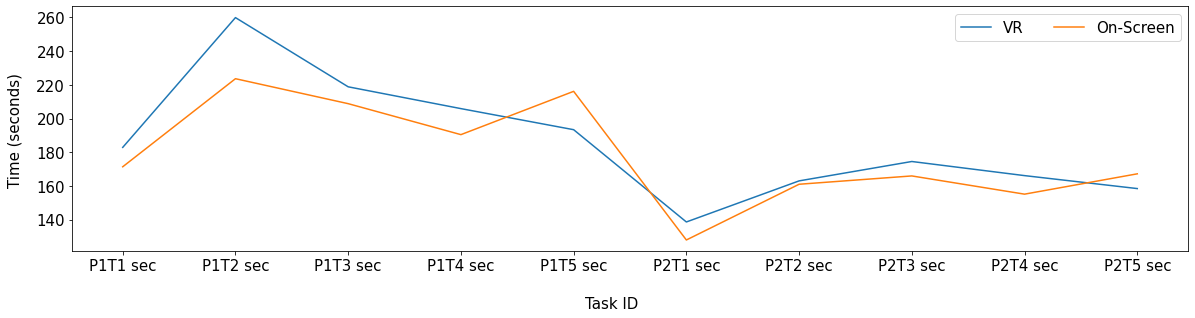

In [90]:
# VR vs On-Screen, each task
vr_vs_sc_eachtask = pd.DataFrame()


vr_first_part = (first_vr_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_vr_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
vr_second_part = (first_sc_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
vr_series_all = vr_first_part.append(vr_second_part)
vr_df =pd.concat([vr_series_all],axis=1)
vr_df.columns = ['VR']
vr_df = vr_df.transpose()

sc_first_part = (first_sc_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
sc_second_part = (first_vr_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_vr_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
sc_series_all = sc_first_part.append(sc_second_part)
sc_df =pd.concat([sc_series_all],axis=1)
sc_df.columns = ['On-Screen']
sc_df = sc_df.transpose()


vr_vs_sc_eachtask = pd.concat([vr_df, sc_df]).transpose()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
vr_vs_sc_eachtask['VR'].plot.line(label='VR')
vr_vs_sc_eachtask['On-Screen'].plot.line(label='On-Screen')
axes.set_xticks(np.arange(10));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'])
fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_eachtask_scvr_evolution.png', bbox_inches='tight')

# Calc difference
vr_vs_sc_eachtask['diff'] = vr_vs_sc_eachtask['VR'].sub(vr_vs_sc_eachtask['On-Screen'], axis = 0)
vr_vs_sc_eachtask.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']

print(vr_vs_sc_eachtask)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_vrsceach_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_vr_openshift_times['P1T1 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_vr_openshift_times['P1T2 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_vr_openshift_times['P1T3 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_vr_openshift_times['P1T4 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_vr_openshift_times['P1T5 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T1 sec'].values, first_vr_openshift_times['P2T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T2 sec'].values, first_vr_openshift_times['P2T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T3 sec'].values, first_vr_openshift_times['P2T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T4 sec'].values, first_vr_openshift_times['P2T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(np.concatenate((first_sc_chaoss_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T5 sec'].values, first_vr_openshift_times['P2T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# All
vr_times_concat = pd.concat([first_vr_openshift_times['P1T1 sec'], first_vr_openshift_times['P1T2 sec'], first_vr_openshift_times['P1T3 sec'], 
                             first_vr_openshift_times['P1T4 sec'], first_vr_openshift_times['P1T5 sec'], first_vr_chaoss_times['P1T1 sec'], 
                             first_vr_chaoss_times['P1T2 sec'], first_vr_chaoss_times['P1T3 sec'], first_vr_chaoss_times['P1T4 sec'], 
                             first_vr_chaoss_times['P1T5 sec'], first_sc_openshift_times['P2T1 sec'], first_sc_openshift_times['P2T2 sec'], first_sc_openshift_times['P2T3 sec'], 
                             first_sc_openshift_times['P2T4 sec'], first_sc_openshift_times['P2T5 sec'], first_sc_chaoss_times['P2T1 sec'], 
                             first_sc_chaoss_times['P2T2 sec'], first_sc_chaoss_times['P2T3 sec'], first_sc_chaoss_times['P2T4 sec'], 
                             first_sc_chaoss_times['P2T5 sec']])
sc_times_concat = pd.concat([first_sc_openshift_times['P1T1 sec'], first_sc_openshift_times['P1T2 sec'], first_sc_openshift_times['P1T3 sec'], 
                             first_sc_openshift_times['P1T4 sec'], first_sc_openshift_times['P1T5 sec'], first_sc_chaoss_times['P1T1 sec'], 
                             first_sc_chaoss_times['P1T2 sec'], first_sc_chaoss_times['P1T3 sec'], first_sc_chaoss_times['P1T4 sec'], 
                             first_sc_chaoss_times['P1T5 sec'], first_vr_openshift_times['P2T1 sec'], first_vr_openshift_times['P2T2 sec'], first_vr_openshift_times['P2T3 sec'], 
                             first_vr_openshift_times['P2T4 sec'], first_vr_openshift_times['P2T5 sec'], first_vr_chaoss_times['P2T1 sec'], 
                             first_vr_chaoss_times['P2T2 sec'], first_vr_chaoss_times['P2T3 sec'], first_vr_chaoss_times['P2T4 sec'], 
                             first_vr_chaoss_times['P2T5 sec']])
stat, p = mannwhitneyu(vr_times_concat.values, sc_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_vrsceach_df = pd.concat([mannwhitney_vrsceach_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_vr_openshift_times['P1T1 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_vr_openshift_times['P1T2 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_vr_openshift_times['P1T3 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_vr_openshift_times['P1T4 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_vr_openshift_times['P1T5 sec'].values), axis=None)
                       , np.concatenate((first_sc_chaoss_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T1 sec'].values, first_vr_openshift_times['P2T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T2 sec'].values, first_vr_openshift_times['P2T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T3 sec'].values, first_vr_openshift_times['P2T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T4 sec'].values, first_vr_openshift_times['P2T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_sc_chaoss_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T5 sec'].values, first_vr_openshift_times['P2T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_vrsceach_df, cliff_df], axis=1)
print(mann_cliff)

# Show all table

results_mann_cliff = pd.concat([vr_vs_sc_eachtask, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

/tmp/ipykernel_7706/2131214117.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chaoss_series_all = chaoss_first_part.append(chaoss_second_part)
/tmp/ipykernel_7706/2131214117.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  openshift_series_all = openshift_first_part.append(openshift_second_part)


        CHAOSS  Openshift     diff
P1T1  136.6250   217.7500 -81.1250
P1T2  255.8750   227.7500  28.1250
P1T3  196.0000   231.7500 -35.7500
P1T4  194.6250   201.8125  -7.1875
P1T5  196.1250   213.5000 -17.3750
P2T1  136.8750   129.8125   7.0625
P2T2  168.7500   155.3750  13.3750
P2T3  176.3750   164.1875  12.1875
P2T4  169.7500   151.6250  18.1250
P2T5  170.9375   154.8125  16.1250
            U   p-value Cliff Eff Size
P1T1     64.5  0.017526       0.496094
P1T2    135.0  0.806404       0.054688
P1T3     90.0  0.157405       0.296875
P1T4    104.5  0.385853       0.183594
P1T5     95.0  0.220405       0.257812
P2T1    140.5  0.650838       0.097656
P2T2    143.5   0.57167       0.121094
P2T3    147.0   0.48557       0.148438
P2T4    162.0  0.206616       0.265625
P2T5    161.0   0.22049       0.257812
All   12274.5   0.52578       0.041055
\begin{tabular}{lrrrlll}
\toprule
{} &    CHAOSS &  Openshift &     diff &        U &   p-value & Cliff Eff Size \\
\midrule
P1T1 &  136.6250 &   2

/tmp/ipykernel_7706/2131214117.py:207: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


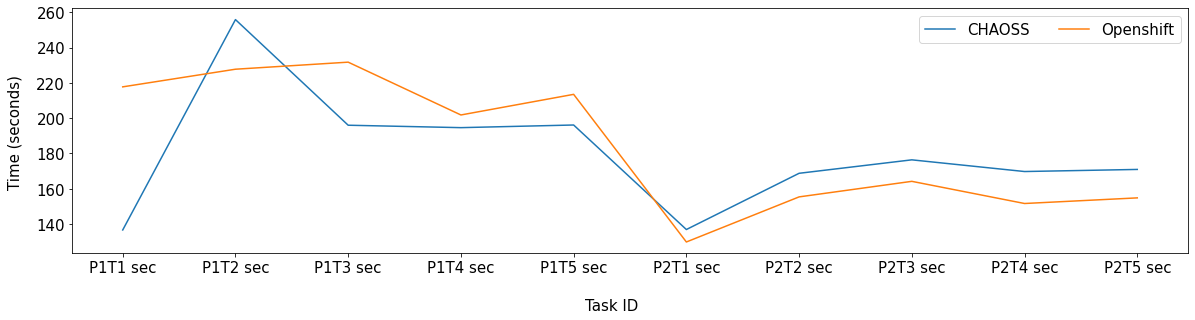

In [91]:
# Chaoss VS Openshift, each tasks
chaoss_vs_openshift_eachtask = pd.DataFrame()


chaoss_first_part = (first_vr_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
chaoss_second_part = (first_vr_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
chaoss_series_all = chaoss_first_part.append(chaoss_second_part)
chaoss_df =pd.concat([chaoss_series_all],axis=1)
chaoss_df.columns = ['CHAOSS']
chaoss_df = chaoss_df.transpose()

openshift_first_part = (first_vr_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
openshift_second_part = (first_vr_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
openshift_series_all = openshift_first_part.append(openshift_second_part)
openshift_df =pd.concat([openshift_series_all],axis=1)
openshift_df.columns = ['Openshift']
openshift_df = openshift_df.transpose()


chaoss_vs_openshift_eachtask = pd.concat([chaoss_df, openshift_df]).transpose()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
chaoss_vs_openshift_eachtask['CHAOSS'].plot.line(label='CHAOSS')
chaoss_vs_openshift_eachtask['Openshift'].plot.line(label='Openshift')
axes.set_xticks(np.arange(10));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec', 'P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec'])
fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_eachtask_project_evolution.png', bbox_inches='tight')

# Calc difference
chaoss_vs_openshift_eachtask['diff'] = chaoss_vs_openshift_eachtask['CHAOSS'].sub(chaoss_vs_openshift_eachtask['Openshift'], axis = 0)
chaoss_vs_openshift_eachtask.index = ['P1T1', 'P1T2', 'P1T3', 'P1T4', 'P1T5', 'P2T1', 'P2T2', 'P2T3', 'P2T4', 'P2T5']

print(chaoss_vs_openshift_eachtask)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_chaossopenshift_df = pd.DataFrame(columns=["U", "p-value"])

# Part 1 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T1"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T2"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T3"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T4"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 1 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P1T5"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T1"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T2"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T3"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T4"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Part 2 Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["P2T5"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# All
chaoss_times_concat = pd.concat([first_sc_chaoss_times['P1T1 sec'], first_sc_chaoss_times['P1T2 sec'], first_sc_chaoss_times['P1T3 sec'], 
                             first_sc_chaoss_times['P1T4 sec'], first_sc_chaoss_times['P1T5 sec'], first_vr_chaoss_times['P1T1 sec'], 
                             first_vr_chaoss_times['P1T2 sec'], first_vr_chaoss_times['P1T3 sec'], first_vr_chaoss_times['P1T4 sec'], 
                             first_vr_chaoss_times['P1T5 sec'], first_sc_openshift_times['P2T1 sec'], first_sc_openshift_times['P2T2 sec'], first_sc_openshift_times['P2T3 sec'], 
                             first_sc_openshift_times['P2T4 sec'], first_sc_openshift_times['P2T5 sec'], first_vr_openshift_times['P2T1 sec'], 
                             first_vr_openshift_times['P2T2 sec'], first_vr_openshift_times['P2T3 sec'], first_vr_openshift_times['P2T4 sec'], 
                             first_vr_openshift_times['P2T5 sec']])
openshift_times_concat = pd.concat([first_sc_openshift_times['P1T1 sec'], first_sc_openshift_times['P1T2 sec'], first_sc_openshift_times['P1T3 sec'], 
                             first_sc_openshift_times['P1T4 sec'], first_sc_openshift_times['P1T5 sec'], first_vr_openshift_times['P1T1 sec'], 
                             first_vr_openshift_times['P1T2 sec'], first_vr_openshift_times['P1T3 sec'], first_vr_openshift_times['P1T4 sec'], 
                             first_vr_openshift_times['P1T5 sec'], first_sc_chaoss_times['P2T1 sec'], first_sc_chaoss_times['P2T2 sec'], first_sc_chaoss_times['P2T3 sec'], 
                             first_sc_chaoss_times['P2T4 sec'], first_sc_chaoss_times['P2T5 sec'], first_vr_chaoss_times['P2T1 sec'], 
                             first_vr_chaoss_times['P2T2 sec'], first_vr_chaoss_times['P2T3 sec'], first_vr_chaoss_times['P2T4 sec'], 
                             first_vr_chaoss_times['P2T5 sec']])
stat, p = mannwhitneyu(chaoss_times_concat.values, openshift_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_chaossopenshift_df = pd.concat([mannwhitney_chaossopenshift_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Part 1 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 1 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P1T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Part 2 Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None)
                       , np.concatenate((first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["P2T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(chaoss_times_concat.values, openshift_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_chaossopenshift_df, cliff_df], axis=1)
print(mann_cliff)

# Show all table

results_mann_cliff = pd.concat([chaoss_vs_openshift_eachtask, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

           VR  On-Screen      diff
T1  160.81250  155.06250   5.75000
T2  211.50000  193.37500  18.12500
T3  196.71875  191.71875   5.00000
T4  186.06250  178.34375   7.71875
T5  175.96875  187.34375 -11.37500
           U   p-value Cliff Eff Size
T1     571.5  0.428132       0.116211
T2     555.5   0.56362       0.084961
T3     601.0  0.234666       0.173828
T4     613.5  0.174945       0.198242
T5     445.0  0.371804       0.130859
All  13953.5    0.1635       0.090117
\begin{tabular}{lrrrlll}
\toprule
{} &         VR &  On-Screen &      diff &        U &   p-value & Cliff Eff Size \\
\midrule
T1  &  160.81250 &  155.06250 &   5.75000 &    571.5 &  0.428132 &       0.116211 \\
T2  &  211.50000 &  193.37500 &  18.12500 &    555.5 &   0.56362 &       0.084961 \\
T3  &  196.71875 &  191.71875 &   5.00000 &    601.0 &  0.234666 &       0.173828 \\
T4  &  186.06250 &  178.34375 &   7.71875 &    613.5 &  0.174945 &       0.198242 \\
T5  &  175.96875 &  187.34375 & -11.37500 &    445.0 &  0

/tmp/ipykernel_7706/972118234.py:169: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


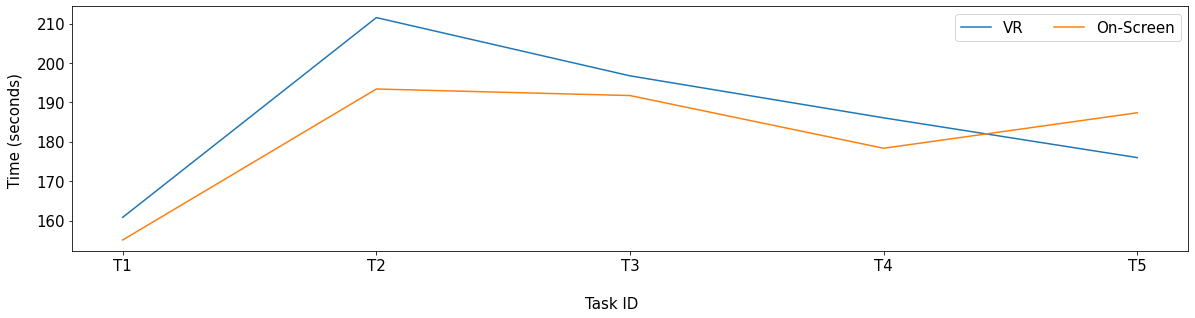

In [92]:
# VR vs On-Screen, all the tasks
vr_vs_sc_alltasks = pd.DataFrame()


vr_first_part = (first_vr_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_vr_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
vr_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
vr_second_part = (first_sc_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
vr_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
vr_series_all = (vr_first_part + vr_second_part)/2
vr_df =pd.concat([vr_series_all],axis=1)
vr_df.columns = ['VR']
vr_df = vr_df.transpose()

sc_first_part = (first_sc_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
sc_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
sc_second_part = (first_sc_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
sc_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
sc_series_all = (sc_first_part + sc_second_part)/2
sc_df =pd.concat([sc_series_all],axis=1)
sc_df.columns = ['On-Screen']
sc_df = sc_df.transpose()

vr_vs_sc_alltasks = pd.concat([vr_df, sc_df]).transpose()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
vr_vs_sc_alltasks['VR'].plot.line(label='VR')
vr_vs_sc_alltasks['On-Screen'].plot.line(label='On-Screen')
axes.set_xticks(np.arange(5));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['T1', 'T2', 'T3', 'T4', 'T5'])
fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_alltasks_scvr_evolution.png', bbox_inches='tight')

# Calc difference
vr_vs_sc_alltasks['diff'] = vr_vs_sc_alltasks['VR'].sub(vr_vs_sc_alltasks['On-Screen'], axis = 0)

print(vr_vs_sc_alltasks)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_vrscall_df = pd.DataFrame(columns=["U", "p-value"])

# Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_vr_openshift_times['P1T1 sec'].values, 
                                       first_sc_chaoss_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values,
                                       first_vr_chaoss_times['P2T1 sec'].values, first_vr_openshift_times['P2T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T1"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_vr_openshift_times['P1T2 sec'].values, 
                                       first_sc_chaoss_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values,
                                       first_vr_chaoss_times['P2T2 sec'].values, first_vr_openshift_times['P2T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T2"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_vr_openshift_times['P1T3 sec'].values, 
                                       first_sc_chaoss_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values,
                                       first_vr_chaoss_times['P2T3 sec'].values, first_vr_openshift_times['P2T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T3"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_vr_openshift_times['P1T4 sec'].values, 
                                       first_sc_chaoss_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values,
                                       first_vr_chaoss_times['P2T4 sec'].values, first_vr_openshift_times['P2T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T4"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_vr_openshift_times['P1T5 sec'].values, 
                                       first_sc_chaoss_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values,
                                       first_vr_chaoss_times['P2T5 sec'].values, first_vr_openshift_times['P2T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T5"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# All
vr_times_concat = pd.concat([first_vr_openshift_times['P1T1 sec'], first_vr_openshift_times['P1T2 sec'], first_vr_openshift_times['P1T3 sec'], 
                             first_vr_openshift_times['P1T4 sec'], first_vr_openshift_times['P1T5 sec'], first_vr_chaoss_times['P1T1 sec'], 
                             first_vr_chaoss_times['P1T2 sec'], first_vr_chaoss_times['P1T3 sec'], first_vr_chaoss_times['P1T4 sec'], 
                             first_vr_chaoss_times['P1T5 sec'], first_sc_openshift_times['P2T1 sec'], first_sc_openshift_times['P2T2 sec'], first_sc_openshift_times['P2T3 sec'], 
                             first_sc_openshift_times['P2T4 sec'], first_sc_openshift_times['P2T5 sec'], first_sc_chaoss_times['P2T1 sec'], 
                             first_sc_chaoss_times['P2T2 sec'], first_sc_chaoss_times['P2T3 sec'], first_sc_chaoss_times['P2T4 sec'], 
                             first_sc_chaoss_times['P2T5 sec']])
sc_times_concat = pd.concat([first_sc_openshift_times['P1T1 sec'], first_sc_openshift_times['P1T2 sec'], first_sc_openshift_times['P1T3 sec'], 
                             first_sc_openshift_times['P1T4 sec'], first_sc_openshift_times['P1T5 sec'], first_sc_chaoss_times['P1T1 sec'], 
                             first_sc_chaoss_times['P1T2 sec'], first_sc_chaoss_times['P1T3 sec'], first_sc_chaoss_times['P1T4 sec'], 
                             first_sc_chaoss_times['P1T5 sec'], first_vr_openshift_times['P2T1 sec'], first_vr_openshift_times['P2T2 sec'], first_vr_openshift_times['P2T3 sec'], 
                             first_vr_openshift_times['P2T4 sec'], first_vr_openshift_times['P2T5 sec'], first_vr_chaoss_times['P2T1 sec'], 
                             first_vr_chaoss_times['P2T2 sec'], first_vr_chaoss_times['P2T3 sec'], first_vr_chaoss_times['P2T4 sec'], 
                             first_vr_chaoss_times['P2T5 sec']])
stat, p = mannwhitneyu(vr_times_concat.values, sc_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_vrscall_df = pd.concat([mannwhitney_vrscall_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_vr_openshift_times['P1T1 sec'].values, 
                                       first_sc_chaoss_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values,
                                       first_vr_chaoss_times['P2T1 sec'].values, first_vr_openshift_times['P2T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_vr_openshift_times['P1T2 sec'].values, 
                                       first_sc_chaoss_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values,
                                       first_vr_chaoss_times['P2T2 sec'].values, first_vr_openshift_times['P2T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_vr_openshift_times['P1T3 sec'].values, 
                                       first_sc_chaoss_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values,
                                       first_vr_chaoss_times['P2T3 sec'].values, first_vr_openshift_times['P2T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_vr_openshift_times['P1T4 sec'].values, 
                                       first_sc_chaoss_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values,
                                       first_vr_chaoss_times['P2T4 sec'].values, first_vr_openshift_times['P2T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_vr_openshift_times['P1T5 sec'].values, 
                                       first_sc_chaoss_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None), 
                       np.concatenate((first_sc_chaoss_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values,
                                       first_vr_chaoss_times['P2T5 sec'].values, first_vr_openshift_times['P2T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_vrscall_df, cliff_df], axis=1)
print(mann_cliff)

# Show all table

results_mann_cliff = pd.concat([vr_vs_sc_alltasks, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())

       CHAOSS  Openshift      diff
T1  136.75000  173.78125 -37.03125
T2  212.31250  191.56250  20.75000
T3  186.18750  197.96875 -11.78125
T4  182.18750  176.71875   5.46875
T5  183.53125  184.15625  -0.62500
           U   p-value Cliff Eff Size
T1     397.5  0.125754       0.223633
T2     534.0  0.772783       0.042969
T3     479.0  0.662527       0.064453
T4     543.5  0.677156       0.061523
T5     507.5  0.957158       0.008789
All  12274.5   0.52578       0.090117
\begin{tabular}{lrrrlll}
\toprule
{} &     CHAOSS &  Openshift &      diff &        U &   p-value & Cliff Eff Size \\
\midrule
T1  &  136.75000 &  173.78125 & -37.03125 &    397.5 &  0.125754 &       0.223633 \\
T2  &  212.31250 &  191.56250 &  20.75000 &    534.0 &  0.772783 &       0.042969 \\
T3  &  186.18750 &  197.96875 & -11.78125 &    479.0 &  0.662527 &       0.064453 \\
T4  &  182.18750 &  176.71875 &   5.46875 &    543.5 &  0.677156 &       0.061523 \\
T5  &  183.53125 &  184.15625 &  -0.62500 &    507.5 &  0

/tmp/ipykernel_7706/4135510753.py:170: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_mann_cliff.to_latex())


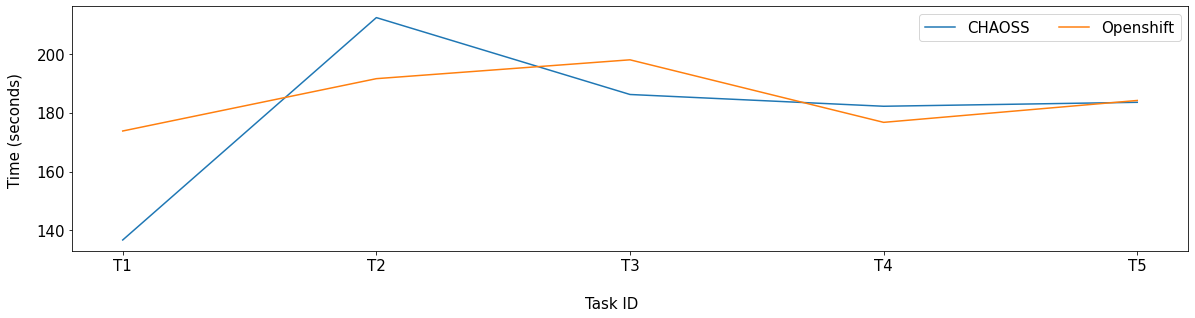

In [93]:
# CHAOSS vs OpenShift, all the tasks
chaoss_vs_openshift_alltasks = pd.DataFrame()


chaoss_first_part = (first_vr_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_chaoss_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
chaoss_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
chaoss_second_part = (first_vr_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_openshift_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
chaoss_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
chaoss_series_all = (chaoss_first_part + chaoss_second_part)/2
chaoss_df =pd.concat([chaoss_series_all],axis=1)
chaoss_df.columns = ['CHAOSS']
chaoss_df = chaoss_df.transpose()

openshift_first_part = (first_vr_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean() + first_sc_openshift_times[['P1T1 sec', 'P1T2 sec', 'P1T3 sec', 'P1T4 sec', 'P1T5 sec']].mean())/2
openshift_first_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
openshift_second_part = (first_vr_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean() + first_sc_chaoss_times[['P2T1 sec', 'P2T2 sec', 'P2T3 sec', 'P2T4 sec', 'P2T5 sec']].mean())/2
openshift_second_part.index = ['T1', 'T2', 'T3', 'T4', 'T5']
openshift_series_all = (openshift_first_part + openshift_second_part)/2
openshift_df =pd.concat([openshift_series_all],axis=1)
openshift_df.columns = ['Openshift']
openshift_df = openshift_df.transpose()

chaoss_vs_openshift_alltasks = pd.concat([chaoss_df, openshift_df]).transpose()

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 4.5))
chaoss_vs_openshift_alltasks['CHAOSS'].plot.line(label='CHAOSS')
chaoss_vs_openshift_alltasks['Openshift'].plot.line(label='Openshift')
axes.set_xticks(np.arange(5));
axes.legend(ncol=5,loc = 'upper right')
axes.set_xticklabels(['T1', 'T2', 'T3', 'T4', 'T5'])
fig.text(0.5, -0.05, 'Task ID', ha='center')
fig.text(0.08, 0.5, 'Time (seconds)', va='center', rotation='vertical')

plt.savefig('timing_alltasks_project_evolution.png', bbox_inches='tight')

# Calc difference
chaoss_vs_openshift_alltasks['diff'] = chaoss_vs_openshift_alltasks['CHAOSS'].sub(chaoss_vs_openshift_alltasks['Openshift'], axis = 0)

print(chaoss_vs_openshift_alltasks)

####################################################################################
# Mann Whitney Tests
### VR vs SC

from scipy.stats import mannwhitneyu

mannwhitney_chaossopenshiftall_df = pd.DataFrame(columns=["U", "p-value"])

# Task 1
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values, 
                                 first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None), 
                 np.concatenate((first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values,
                                       first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T1"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 2
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values, 
                                 first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None), 
                 np.concatenate((first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values,
                                       first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T2"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 3
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T3 sec'].values, 
                                 first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None), 
                 np.concatenate((first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values,
                                       first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T3 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T3"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 4
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values, 
                                 first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None), 
                 np.concatenate((first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values,
                                       first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T4"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Task 5
stat, p = mannwhitneyu(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values, 
                                 first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None), 
                 np.concatenate((first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values,
                                       first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values), axis=None), alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["T5"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# All
chaoss_times_concat = pd.concat([first_sc_chaoss_times['P1T1 sec'], first_sc_chaoss_times['P1T2 sec'], first_sc_chaoss_times['P1T3 sec'], 
                             first_sc_chaoss_times['P1T4 sec'], first_sc_chaoss_times['P1T5 sec'], first_vr_chaoss_times['P1T1 sec'], 
                             first_vr_chaoss_times['P1T2 sec'], first_vr_chaoss_times['P1T3 sec'], first_vr_chaoss_times['P1T4 sec'], 
                             first_vr_chaoss_times['P1T5 sec'], first_sc_openshift_times['P2T1 sec'], first_sc_openshift_times['P2T2 sec'], first_sc_openshift_times['P2T3 sec'], 
                             first_sc_openshift_times['P2T4 sec'], first_sc_openshift_times['P2T5 sec'], first_vr_openshift_times['P2T1 sec'], 
                             first_vr_openshift_times['P2T2 sec'], first_vr_openshift_times['P2T3 sec'], first_vr_openshift_times['P2T4 sec'], 
                             first_vr_openshift_times['P2T5 sec']])
openshift_times_concat = pd.concat([first_sc_openshift_times['P1T1 sec'], first_sc_openshift_times['P1T2 sec'], first_sc_openshift_times['P1T3 sec'], 
                             first_sc_openshift_times['P1T4 sec'], first_sc_openshift_times['P1T5 sec'], first_vr_openshift_times['P1T1 sec'], 
                             first_vr_openshift_times['P1T2 sec'], first_vr_openshift_times['P1T3 sec'], first_vr_openshift_times['P1T4 sec'], 
                             first_vr_openshift_times['P1T5 sec'], first_sc_chaoss_times['P2T1 sec'], first_sc_chaoss_times['P2T2 sec'], first_sc_chaoss_times['P2T3 sec'], 
                             first_sc_chaoss_times['P2T4 sec'], first_sc_chaoss_times['P2T5 sec'], first_vr_chaoss_times['P2T1 sec'], 
                             first_vr_chaoss_times['P2T2 sec'], first_vr_chaoss_times['P2T3 sec'], first_vr_chaoss_times['P2T4 sec'], 
                             first_vr_chaoss_times['P2T5 sec']])
stat, p = mannwhitneyu(chaoss_times_concat.values, openshift_times_concat.values, alternative="two-sided")
dn_row = pd.DataFrame({ 'U': stat, 'p-value': p }, index = ["All"])
mannwhitney_chaossopenshiftall_df = pd.concat([mannwhitney_chaossopenshiftall_df, dn_row])

# Cliff Effect Size
### VR vs SC

cliff_df = pd.DataFrame(columns=["Cliff Eff Size"])

# Task 1
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T1 sec'].values, first_sc_chaoss_times['P1T1 sec'].values, 
                                       first_vr_openshift_times['P2T1 sec'].values, first_sc_openshift_times['P2T1 sec'].values), axis=None), 
                       np.concatenate((first_vr_openshift_times['P1T1 sec'].values, first_sc_openshift_times['P1T1 sec'].values,
                                       first_vr_chaoss_times['P2T1 sec'].values, first_sc_chaoss_times['P2T1 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T1"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 2
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T2 sec'].values, first_sc_chaoss_times['P1T2 sec'].values, 
                                       first_vr_openshift_times['P2T2 sec'].values, first_sc_openshift_times['P2T2 sec'].values), axis=None), 
                       np.concatenate((first_vr_openshift_times['P1T2 sec'].values, first_sc_openshift_times['P1T2 sec'].values,
                                       first_vr_chaoss_times['P2T2 sec'].values, first_sc_chaoss_times['P2T2 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T2"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 3
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T3 sec'].values, first_sc_chaoss_times['P1T3 sec'].values, 
                                       first_vr_openshift_times['P2T3 sec'].values, first_sc_openshift_times['P2T3 sec'].values), axis=None), 
                       np.concatenate((first_vr_openshift_times['P1T3 sec'].values, first_sc_openshift_times['P1T3 sec'].values,
                                       first_vr_chaoss_times['P2T3 sec'].values, first_sc_chaoss_times['P2T3 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T3"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 4
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T4 sec'].values, first_sc_chaoss_times['P1T4 sec'].values, 
                                       first_vr_openshift_times['P2T4 sec'].values, first_sc_openshift_times['P2T4 sec'].values), axis=None), 
                       np.concatenate((first_vr_openshift_times['P1T4 sec'].values, first_sc_openshift_times['P1T4 sec'].values,
                                       first_vr_chaoss_times['P2T4 sec'].values, first_sc_chaoss_times['P2T4 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T4"])
cliff_df = pd.concat([cliff_df, dn_row])

# Task 5
stat, isdif = cliffsDelta(np.concatenate((first_vr_chaoss_times['P1T5 sec'].values, first_sc_chaoss_times['P1T5 sec'].values, 
                                       first_vr_openshift_times['P2T5 sec'].values, first_sc_openshift_times['P2T5 sec'].values), axis=None), 
                       np.concatenate((first_vr_openshift_times['P1T5 sec'].values, first_sc_openshift_times['P1T5 sec'].values,
                                       first_vr_chaoss_times['P2T5 sec'].values, first_sc_chaoss_times['P2T5 sec'].values), axis=None))
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["T5"])
cliff_df = pd.concat([cliff_df, dn_row])

# All
stat, isdif = cliffsDelta(vr_times_concat.values, sc_times_concat.values)
dn_row = pd.DataFrame({ 'Cliff Eff Size': stat }, index = ["All"])
cliff_df = pd.concat([cliff_df, dn_row])

# Show table
cliff_df

# Show table
mann_cliff = pd.concat([mannwhitney_chaossopenshiftall_df, cliff_df], axis=1)
print(mann_cliff)


# Show all table

results_mann_cliff = pd.concat([chaoss_vs_openshift_alltasks, mann_cliff], axis=1)
print(results_mann_cliff.to_latex())